In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns


pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
df = pd.read_csv('data/trafficsources.csv')
df.describe()

,Revenue
count,900.00
mean,16441.94
std,13136.76
min,0.00
25%,7720.59
50%,10807.92
75%,17508.41
max,60000.00


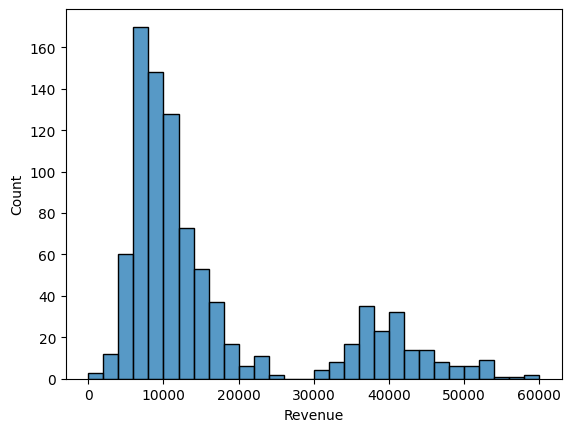

In [5]:
sns.histplot(df.Revenue);

In [6]:
np.median(df.Revenue)

10807.925

In [7]:
np.percentile(df.Revenue, 50)

10807.925

In [8]:
np.quantile(df.Revenue, 0.5)

10807.925

In [9]:
Q1 = np.quantile(df.Revenue, 0.25)
Q3 = np.quantile(df.Revenue, 0.75)
IQR = Q3 - Q1
print(f"IQR = {IQR}")

IQR = 9787.815000000002


In [10]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower bound = {lower_bound}")
print(f"Upper bound = {upper_bound}")

Lower bound = -6961.130000000004
Upper bound = 32190.130000000005


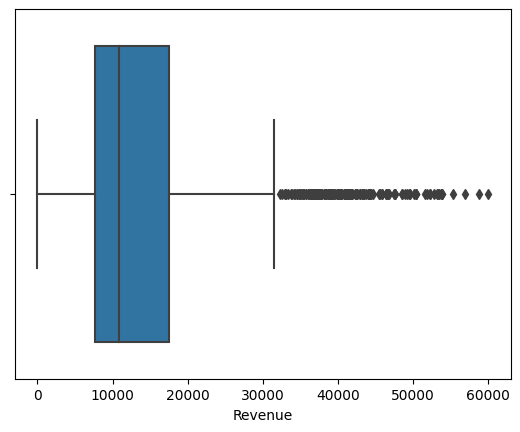

In [11]:
sns.boxplot(x = df.Revenue);

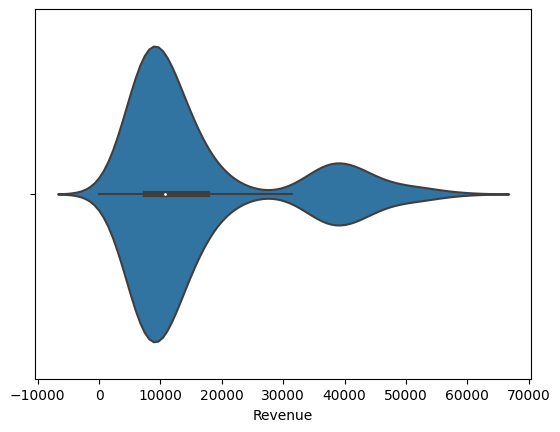

In [12]:
sns.violinplot(x = df.Revenue);

In [18]:
paid_search = [12, 3, 23, 32, 34, 76, 6, 23, 2, 23, 75, 23, 24, 34, 46, 34, 74, 8, 7, 96, 64]
paid_social = [76, 6, 23, 2]

df = pd.DataFrame(
    {'paid_search' : pd.Series(paid_search),
    'paid_social' : pd.Series(paid_social)}
    )

In [19]:
df.mean()

paid_search   34.24
paid_social   26.75
dtype: float64

In [20]:
np.mean(df.mean())

30.49404761904762

In [21]:
df.unstack().mean()

33.04

In [22]:
df.agg(['mean', 'count'])

,paid_search,paid_social
mean,34.24,26.75
count,21.00,4.00


In [24]:
total_counts = df.count().sum()
paid_search_proportion = df.paid_search.count()
paid_search_average = df.paid_search.mean()
paid_social_proportion = df.paid_social.count()
paid_social_average = df.paid_social.mean()

total_average = np.divide(paid_search_proportion * paid_search_average + paid_social_proportion * paid_social_average, total_counts)
print(total_average)


33.04


In [26]:
conversions_a = [12, 11, 10, 15, 9, 12]

print(f"mean = {np.mean(conversions_a)}")
print(f"median = {np.median(conversions_a)}")

mean = 11.5
median = 11.5


In [27]:
conversions_a.append(100)

print(f"mean = {np.mean(conversions_a)}")
print(f"median = {np.median(conversions_a)}")

mean = 24.142857142857142
median = 12.0


In [29]:
# Population Variance
def pop_variance(data):
    n = len(data)
    mean = sum(data) / n
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / n
    return variance

# Sample Variance
def sample_variance(data):
    n = len(data)
    mean = sum(data) / n
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / (n - 1)
    return variance


In [30]:
# Population Standard Deviation
def pop_std_dev(data):
    return np.sqrt(pop_variance(data))

# Sample Standard Deviation
def sample_std_dev(data):
    return np.sqrt(sample_variance(data))


In [32]:
from sklearn.impute import SimpleImputer

# Mean Imputer
mean_imputer = SimpleImputer(strategy='mean')

# Median Imputer
median_imputer = SimpleImputer(strategy='median')


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = scaler.fit_transform(df)
